# **Fraud Detection**

This is a model for detection fraud based on dataset Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

# **Steps**


*   Load dataset
*   Normalize data
*   Train and test split
*   Train model
*   Evaluate and predict



In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
#from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
# Read the CSV file
df = pd.read_csv('creditcard.csv')

# Show the contents
print(df.head(10))

# Describe dataset... min, max, means of fields
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.0183

In [3]:
fraud = df.loc[df['Class']==1]
not_fraud = df.loc[df['Class']==0]
print(len(fraud))
print(len(not_fraud))

492
284315


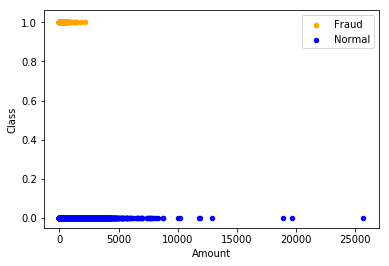

In [4]:
#Exploration data
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
not_fraud.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()


In [5]:
x = df.iloc[:,:-1]
y = df['Class']

In [6]:
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

# Normalize the data
x = normalize(x)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
#Train model
model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluate model
print(model.score(X_test, y_test))

0.999204147794436


In [9]:
#Predictions
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85298
          1       0.88      0.61      0.72       145

avg / total       1.00      1.00      1.00     85443

